<a href="https://colab.research.google.com/github/EktaKumari2011/CODSOFT/blob/main/IrisFLowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Modules

In [205]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



Loading DataSet

In [206]:
iris_data = pd.read_csv('/content/IRIS.csv')

In [207]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [208]:
#data Statistics
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [209]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [210]:
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Preprocessing the dataset

In [211]:
#null values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Exploratory Data Analysis

<Axes: >

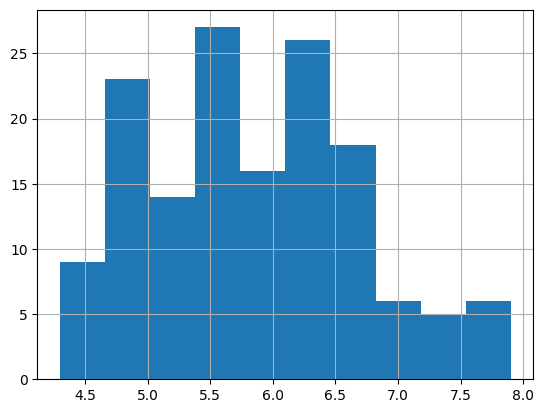

In [212]:
iris_data['sepal_length'].hist()

<Axes: >

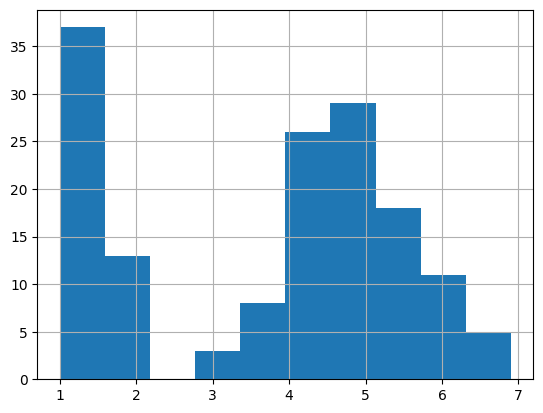

In [213]:
iris_data['petal_length'].hist()

<Axes: >

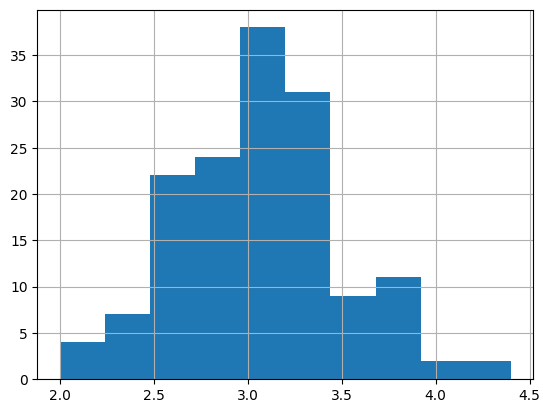

In [214]:
iris_data['sepal_width'].hist()

<Axes: >

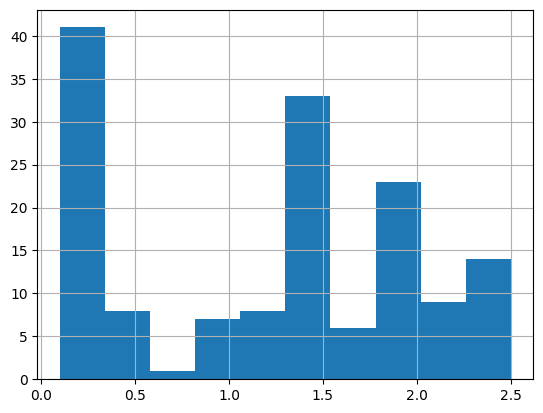

In [215]:
iris_data['petal_width'].hist()

In [216]:
#scatterplot
colors=['red', 'orange','green']
species=['Iris-virginica','Iris-setosa','Iris-versicolor']


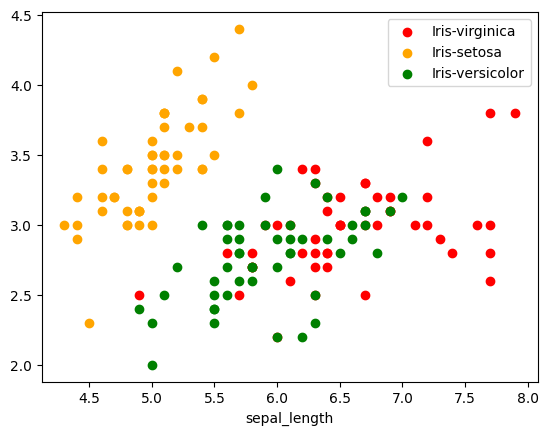

In [217]:
for i in range(3):
  x=iris_data[iris_data['species']==species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
  plt.xlabel("sepal_length")
  plt.ylabel;("sepal_width")
  plt.legend()

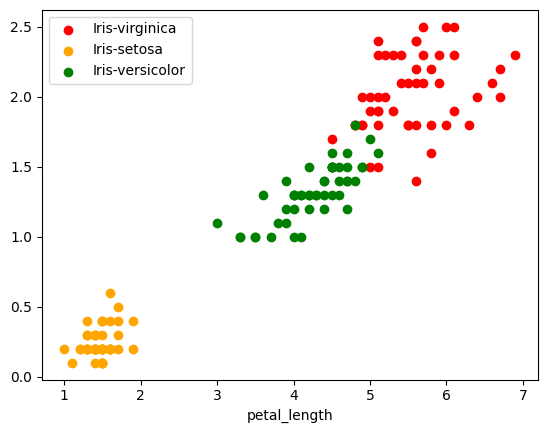

In [218]:
for i in range(3):
  x=iris_data[iris_data['species']==species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel("petal_length")
  plt.ylabel;("petal_width")
  plt.legend()

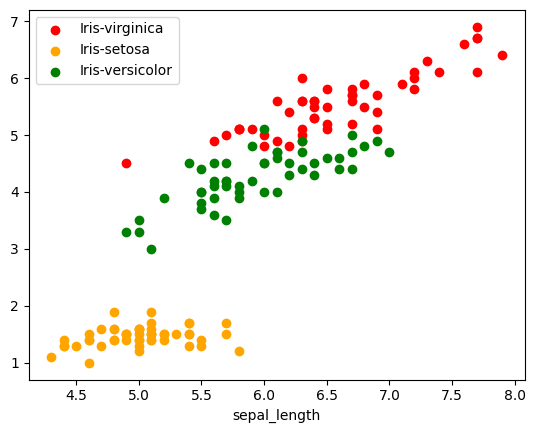

In [219]:
for i in range(3):
  x=iris_data[iris_data['species']==species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
  plt.xlabel("sepal_length")
  plt.ylabel;("petal_length")
  plt.legend()

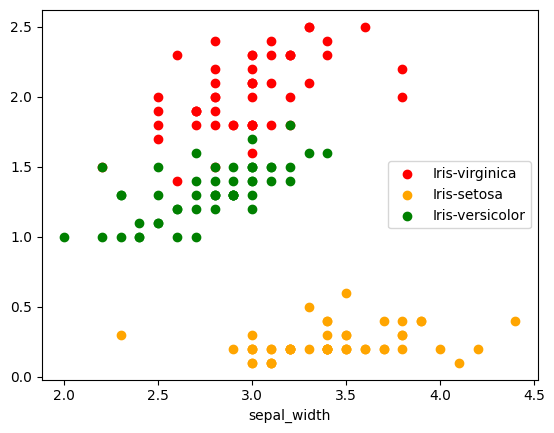

In [220]:
for i in range(3):
  x=iris_data[iris_data['species']==species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel("sepal_width")
  plt.ylabel;("petal_width")
  plt.legend()

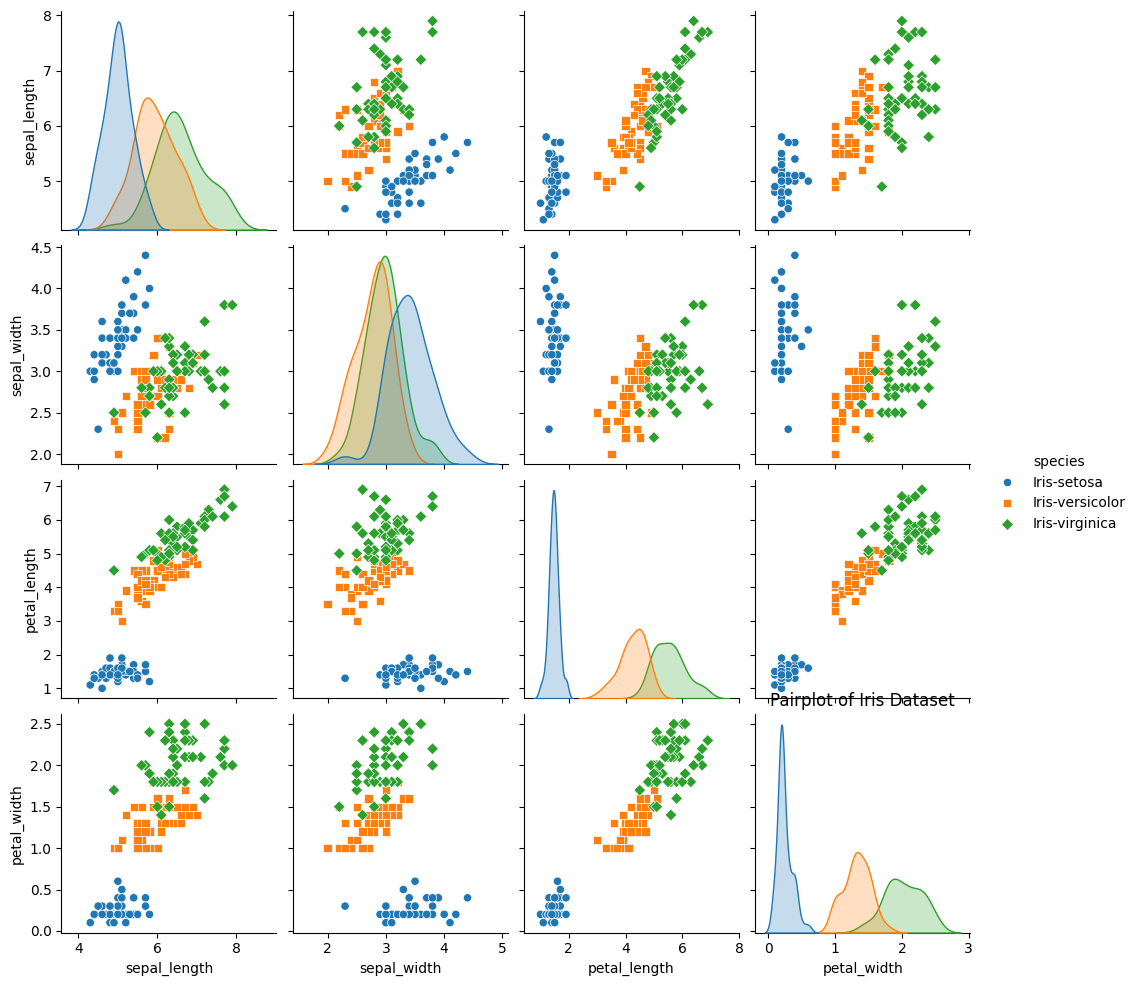

In [221]:
# Pairplot for visualizing pairwise relationships between features colored by species
sns.pairplot(iris_data, hue='species', markers=["o", "s", "D"])
plt.title('Pairplot of Iris Dataset')
plt.show()


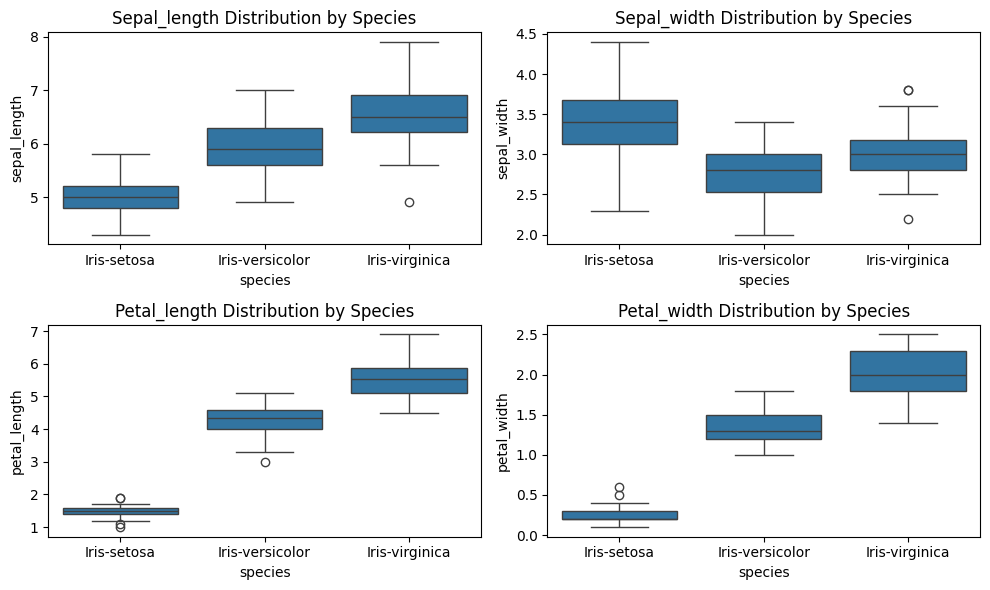

In [222]:
# Boxplot for visualizing the distribution of each feature by species
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_data)
    plt.title(f'{feature.capitalize()} Distribution by Species')
plt.tight_layout()
plt.show()

Coorelation Matrix

<ipython-input-223-31118b2f02b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


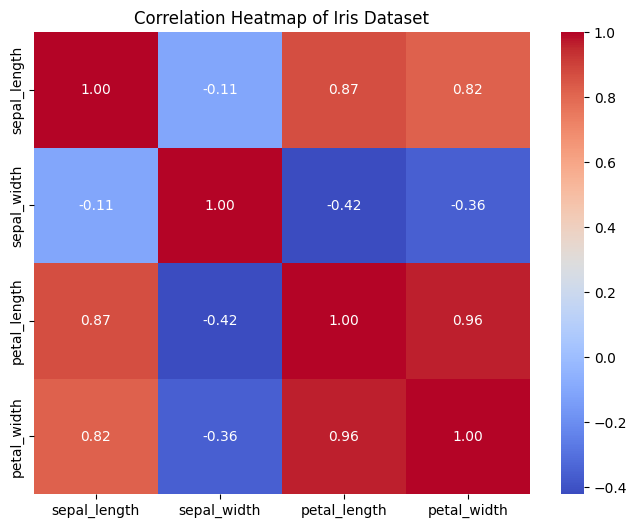

In [223]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

Label Encoder

In [224]:
iris_data['species'] = le.fit_transform(iris_data['species'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [225]:
X = iris_data.drop(columns=['species'])
Y = iris_data['species']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [226]:
 #logistic regression
 model = LogisticRegression()

In [227]:
model.fit(x_train,y_train)

LogisticRegression()

In [228]:
#print metrics
print("Accuracy: ",model.score(x_test,y_test))

Accuracy:  0.9777777777777777


In [229]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
print("Accuracy: ",model.score(x_test,y_test))

Accuracy:  0.9555555555555556


In [230]:
#decision tre
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 0.9555555555555556
